<a href="https://colab.research.google.com/github/Souhib-khalbous/Quantitative-Analysis-of-T2-Coronal-MRI-Data-for-Treatment-Efficiency-in-Uterine-Fibroids-/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount The Data**

In [ ]:

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

# sklearn for ML algorithms, model evaluation, and data preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# **Read the Dataset**

In [ ]:
# Specify the columns you want to use as features
feature_columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']

# Read the 'Raw Data' sheet of the Excel file, selecting only the specified columns plus the 'CLASS' column
dataset = pd.read_excel('/content/drive/MyDrive/Cardiac ECG/CTG.xls', sheet_name='Raw Data', usecols=feature_columns + ['CLASS'])

#remove any row that has at least one NaN value
dataset = dataset.dropna()

#Reset the index of the DataFrame and drop the old index
dataset = dataset.reset_index(drop=True)


print(len(dataset))
print(dataset.head())

# Now you have a DataFrame 'dataset' with only the features you're interested in and the 'CLASS' target variable


2126
      LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...   Min    Max  \
0  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  62.0  126.0   
1  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  68.0  198.0   
2  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  68.0  198.0   
3  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  53.0  170.0   
4  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  53.0  170.0   

   Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  
0   2.0     0.0  120.0  137.0   121.0      73.0       1.0    9.0  
1   6.0     1.0  141.0  136.0   140.0      12.0       0.0    6.0  
2   5.0     1.0  141.0  135.0   138.0      13.0       0.0    6.0  
3  11.0     0.0  137.0  134.0   137.0      13.0       1.0    6.0  
4   9.0     0.0  137.0  136.0   138.0      11.0       1.0    2.0  

[5 rows x 22 columns]


# **Splitting the Data**


*   Define X, y
*   Scale the Features (-1 < Features < +1)

*   Split the Dataset into *Training* and *Testing* Method


In [ ]:
# Define your features and target variable
X = dataset[feature_columns]
y = dataset['CLASS']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Now, X_train & y_train are ready for training your model, and X_test & y_test are ready for evaluating it.


In [ ]:
print(np.unique(y_test, return_counts=True))


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), array([115, 174,  16,  24,  21, 100,  76,  32,  21,  59]))


In [ ]:
print(dataset.shape)
# Check the shape of the dataframes
print("\nShape of X_train:", X_train.shape)
print("\nShape of y_train:", y_train.shape)
print("\nShape of X_test:", X_test.shape)
print("\nShape of y_test:", y_test.shape)


(2126, 22)

Shape of X_train: (1488, 21)

Shape of y_train: (1488,)

Shape of X_test: (638, 21)

Shape of y_test: (638,)


# **Feature Scaling**

***Rule:*** Any alogorithm that computes distance or assumes normality, **scale your features!**

i.g: when we'll apply *KNN*

**Remember:**
*standard scalar* means:
instead of the data to be for example from 5 to 7000 in one column, and from 2 to 3004 in the other column.
We'll set the data to be between -1 and +1

In [ ]:
sc_X= StandardScaler() # we import the standard scalar for this variable sc_X
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#  **KNN Algorithm**

Defining the model using KNeighborsClassifier and fit the train data in the model

In [ ]:
import math

math.sqrt(len(y_test))
# we use this block to know what is the suitable value that we can use
# for the value of K.

#==> I got 20 (after running this cell). which is an Even number. And since in the voting we want something
# odd. So, we'll use 20 - 1 = 19

25.25866188063018

In [ ]:
#define the model: Init K-NN

classifier = KNeighborsClassifier(n_neighbors = 11, p=2, metric= 'euclidean') # n_neighbors = K number

#Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
#Predict the test set results
y_pred= classifier.predict(X_test)
y_pred

array([ 1.,  1.,  7.,  1.,  2.,  1.,  2.,  6.,  4.,  1.,  7.,  2.,  7.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  7.,  6.,  2.,  8., 10.,  1.,
        1.,  1.,  2.,  1.,  2.,  9.,  2.,  1.,  2.,  2.,  7.,  2.,  1.,
        1.,  7.,  2., 10.,  7.,  2.,  7.,  7.,  1.,  2.,  2.,  7.,  2.,
        3.,  1., 10.,  9.,  2.,  6., 10.,  4.,  7.,  2.,  2.,  6.,  2.,
        2.,  7.,  2.,  8.,  2.,  8.,  1.,  9.,  7.,  6.,  1.,  2.,  1.,
        1.,  7.,  6.,  6.,  1.,  1.,  2.,  4., 10., 10.,  2.,  7.,  2.,
        7.,  2.,  6., 10.,  6.,  6.,  6.,  2.,  2.,  2.,  8.,  6.,  5.,
        1.,  6.,  6.,  6.,  2.,  9.,  1.,  7.,  6.,  2.,  2.,  6.,  2.,
        2.,  2.,  4.,  6.,  2.,  2.,  6.,  7.,  2.,  6.,  6.,  7.,  2.,
        2.,  2., 10.,  8.,  7.,  6.,  9.,  2.,  1.,  1.,  6.,  1., 10.,
        2.,  9.,  2.,  8.,  6.,  2.,  2.,  6.,  1.,  1.,  1.,  2., 10.,
       10.,  2.,  1.,  7.,  2.,  2.,  6.,  2.,  7.,  6., 10.,  1., 10.,
        2.,  1., 10.,  1.,  2.,  2.,  1.,  2.,  8., 10.,  6.,  1

It's Important to **evaluate** the model.
Let's use the confusion matrix

In [ ]:
#Evaluate Model
cm = confusion_matrix(y_test, y_pred)
#F1_score = f1_score(y_test, y_pred)
print(cm)
#print(F1_score)


# Calculate the accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracy_percent = accuracy * 100

print(f'Accuracy of the model: {accuracy_percent:.2f}%')

[[ 89  14   1   0   1   0   3   0   0   7]
 [ 17 148   1   1   0   4   2   0   0   1]
 [  8   4   3   0   0   0   1   0   0   0]
 [  0  15   0   8   0   1   0   0   0   0]
 [ 10   6   0   0   1   0   0   0   0   4]
 [  0  11   0   0   0  80   7   2   0   0]
 [  4   0   1   0   0  18  50   2   0   1]
 [  0   0   0   0   0   2   3  27   0   0]
 [  4   0   0   0   0   0   0   0  10   7]
 [ 14   2   0   0   0   0   0   0   3  40]]
Accuracy of the model: 71.47%


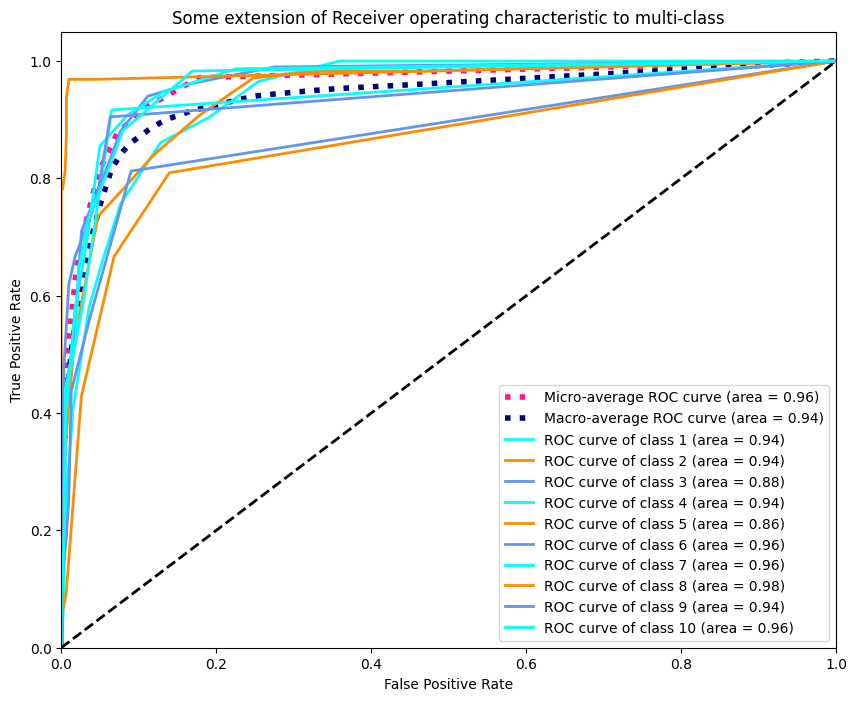

Accuracy: 71.47%


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Binarizing the output
y_bin = label_binarize(y_test, classes=[i for i in range(1, 11)])
n_classes = y_bin.shape[1]

# Predict probabilities
probas_ = classifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), probas_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f'Accuracy: {accuracy * 100:.2f}%')
